# Statistical Analysis of Electroscooters Service

**Project Description:** The GoFast scooter rental service has gained popularity in several cities, providing trips for both subscibed and unsubscribed users. However, to sustain its growth and enhance profitability, it is essential to analyze user behavior, subscription usage and trip patterns. In addition to exploratory data analysis (EDA), this project aims to test the following statistical hypotheses that can help businesses grow: 

- trip duration of subscribed users
- trip distance of subscribed users
- monthly revenue of subscribed users

In addition, it is known that the cost of travel varies depending on the type of subscription. The conditions are:

1. *Subsciption is not purchased:* the cost of one minute trip is 8 RUB; the starting cost is 50 RUB 
2. *Subsciption is purchased:* subscription fee is 199 per month; the cost of one minute trip is 6 RUB, the starting cost is free

**Research Objective:** The primary objective of this analysis is to evaluate the impact of different subscription models on revenue generation and propose recommendations aimed at enhancing user retention and maximizing profitability. By examining patterns in trip duration, distance and frequency, we aim to develop insights that can drive strategic business decisions.

**Sources:** The analysis will utilize three key datasets collected from the GoFast service, encompassing user information, trip details, and subscription specifics. The data span users across various cities who have engaged with the service. Thus, tree DataFrames will be used in this project:

1. The file `users_go.csv` contains user profiles with the following structure:

    - user_id: a unique identifier for each user,
    - name: the name of the user,
    - age: the age of the user,
    - city: the city in which the user resides,
    - subscription_type: the type of subscription held by the user (either free or ultra).   
   
<div>

</div>

2. The file `rides_go.csv` captures details regarding user trips, structured as follows:

    - user_id: a unique identifier for each user,
    - distance: the total trip distance traveled in meters,
    - duration: the total trip duration in minutes,
    - date: the date when the trip occurred.

<div>

</div>


3. Lastly, the file `subscriptions_go.csv` provides insights into the subscription models offered, with the following structure:

    - subscription_type: the type of subscription,
    - minute_price: the cost per minute for each subscription type,
    - start_ride_price: the start cost for each type of subscription,
    - subscription_fee: the monthly fee associated with the subscription.

**Steps:**

1. Primary Data Analysis and its pre-processing
2. EDA
3. Revenue calculation
4. Hypothesis testing
5. Summarizing the results and final recommendations

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st
from scipy.stats import binom

## Primary data analysis 

In [5]:
# creating and exploring dataframes

usgo = pd.read_csv('C:/Users/as100/Documents/Portfolio/users_go.csv')
rigo = pd.read_csv('C:/Users/as100/Documents/Portfolio/rides_go.csv')
sugo = pd.read_csv('C:/Users/as100/Documents/Portfolio/subscriptions_go.csv')

all_dfs = {
    'users_go': usgo,
    'rides_go': rigo,
    'subscriptions_go': sugo
}

for df_name, df in all_dfs.items():
    print(f'DataFrame: {df_name}')  
    print(df.info())
    for _ in range(1):
        print()
    print(df.isna().sum())
    for _ in range(1):
        print()
    print(f'Duplicates in {df_name}: {df.duplicated().sum()}')
    for _ in range(1):
        print()
    print(df.head())
    for _ in range(3):
        print()

DataFrame: users_go
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Duplicates in users_go: 31

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адел

**Summary:**

1. **Users (users_go):**
   - Contains 1 565 records
   - Contains no missing values
   - 31 duplicates were found
   - Includes information on user ID, name, age, city and subscription type
   - Data types are appropriately represented and do not require changes

2. **Rides (rides_go):**
   - Contains 18 068 records
   - Contains no missing values or duplicates
   - Includes information on user ID, distance, duration and trip date
   - The date column needs to be converted to the appropriate datetime format, as the object type is not suitable here

3. **Subscriptions (subscriptions_go):**
   - Includes only 2 raws of subscription types
   - Contains no missing values or duplicates
   - Contains information on subscription type, cost per minute of the trip, starting price and monthly subscription fee
   - Data types do not require changes

## Data pre-processing

In [8]:
# Data types correction
rigo['date'] = pd.to_datetime(rigo['date'])

In [9]:
# Creating new column with month number
rigo['month'] = rigo['date'].dt.month

In [10]:
# Dropping explicit duplicates
usgo = usgo.drop_duplicates()

In [11]:
# Implicit duplicates check
possible_hidden_duplis = ['subscription_type', 'name', 'city']

for i in possible_hidden_duplis:
    print(usgo[i].sort_values().unique())

['free' 'ultra']
['Агата' 'Аделина' 'Адель' 'Айдар' 'Александр' 'Александра' 'Алексей'
 'Алина' 'Алиса' 'Алия' 'Алла' 'Альберт' 'Альбина' 'Алёна' 'Амалия'
 'Амина' 'Амир' 'Анастасия' 'Анатолий' 'Ангелина' 'Андрей' 'Анжелика'
 'Анна' 'Антон' 'Антонина' 'Ариана' 'Арина' 'Арсен' 'Арсений' 'Артемий'
 'Артур' 'Артём' 'Богдан' 'Борис' 'Вадим' 'Валентина' 'Валерий' 'Валерия'
 'Варвара' 'Василий' 'Василина' 'Василиса' 'Вера' 'Вероника' 'Виктор'
 'Виктория' 'Виолетта' 'Виталий' 'Виталина' 'Влад' 'Влада' 'Владимир'
 'Владислав' 'Владислава' 'Всеволод' 'Вячеслав' 'Галина' 'Георгий'
 'Герман' 'Глеб' 'Гордей' 'Григорий' 'Давид' 'Дамир' 'Даниил' 'Данил'
 'Данила' 'Даниэль' 'Дарина' 'Дарья' 'Демид' 'Денис' 'Диана' 'Дмитрий'
 'Ева' 'Евгений' 'Евгения' 'Егор' 'Екатерина' 'Елена' 'Елизавета' 'Елисей'
 'Есения' 'Жанна' 'Зарина' 'Захар' 'Злата' 'Иван' 'Игнат' 'Игорь' 'Ильдар'
 'Илья' 'Инна' 'Ирина' 'Камилла' 'Карина' 'Каролина' 'Кира' 'Кирилл'
 'Константин' 'Кристина' 'Ксения' 'Лариса' 'Лев' 'Леонид' 'Лиа

**Summary:** During the data preprocessing, the following actions were taken:

1. The column containing the date was converted to the date format.
2. A month of the trip column was created.
3. Explicit duplicates in the `users` dataframe were removed.
4. All three dataframes were checked for implicit duplicates: none were found.

### Exploratory Data Analysis (EDA)

### Frequency of city occurrence 

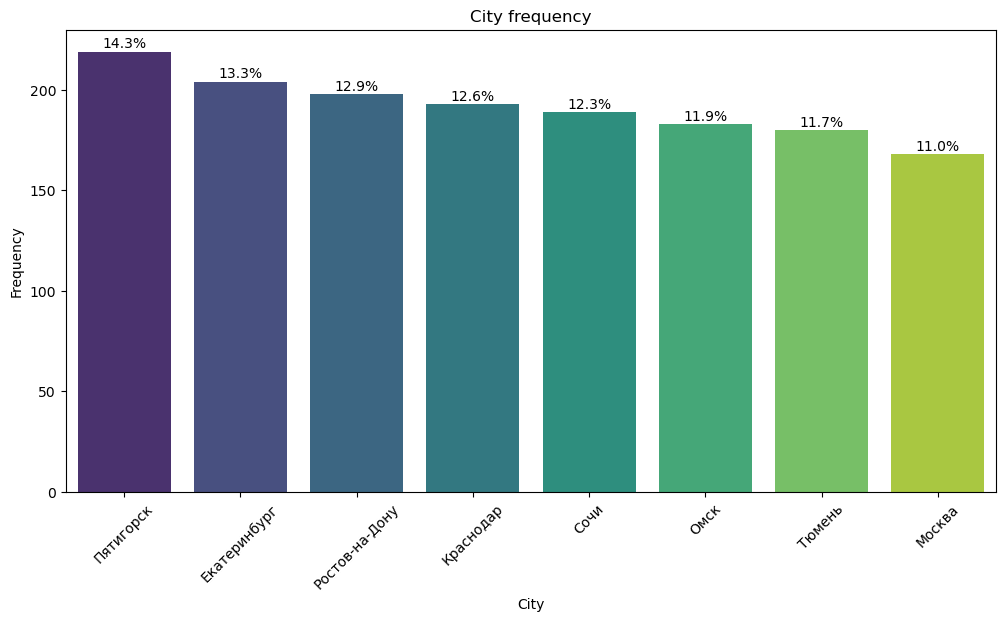

In [15]:
city_frequency = usgo['city'].value_counts()
city_percentage = city_frequency / city_frequency.sum() * 100  

plt.figure(figsize=(12, 6))
sns.barplot(x=city_frequency.index, y=city_frequency.values, hue=city_frequency.index, legend=False, palette='viridis')
plt.title('City frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

for index, value in enumerate(city_frequency.values):
    percentage = city_percentage.iloc[index]
    plt.text(index, value + 2, f'{percentage:.1f}%', ha='center')  

plt.show()

**Summary:** The most frequently occurring city in the sample is Pyatigorsk (14.3% of the total), while the least amount of information in the DataFrame relates to Moscow  (11% of the total). However, it can be said that the data is roughly evenly distributed, as the volatility is only 3.3%.

### Ratio of subscribed and unsubscribed users

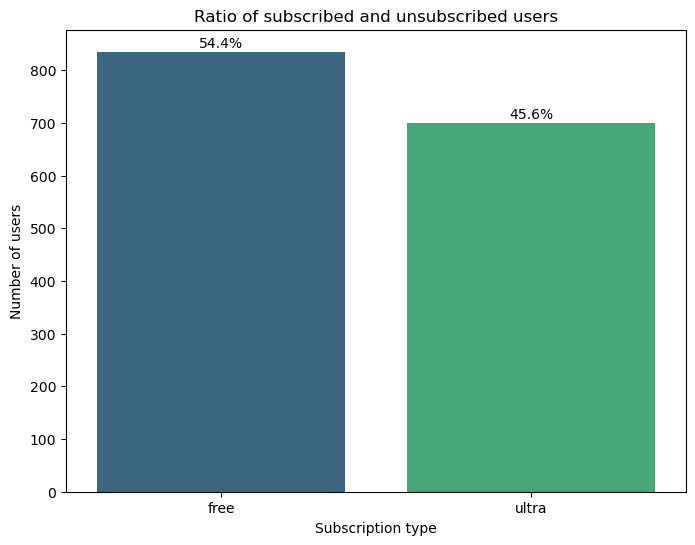

In [18]:
subscription_counts = usgo['subscription_type'].value_counts()
subscription_percentage = subscription_counts / subscription_counts.sum() * 100  

plt.figure(figsize=(8, 6))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, hue=subscription_counts.index, legend=False, palette='viridis')
plt.title('Ratio of subscribed and unsubscribed users')
plt.xlabel('Subscription type')
plt.ylabel('Number of users')

for index, value in enumerate(subscription_counts.values):
    percentage = subscription_percentage.iloc[index]
    plt.text(index, value + 9, f'{percentage:.1f}%', ha='center')  

plt.show()

**Summary:** The majority of users in the dataframe do not have a subscription. However, their dominance is not very strong -- 54.4% of users are without a subscription compared to 45.6% with a subscription.

### Users age

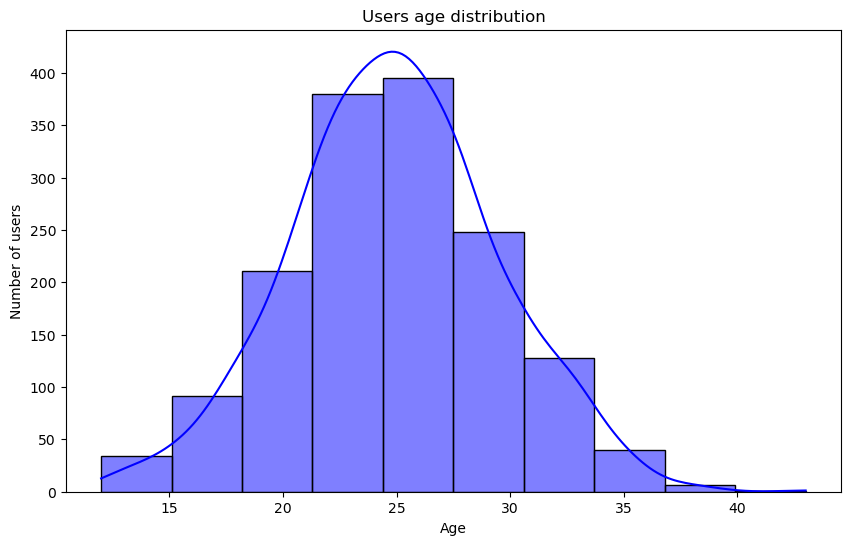

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(usgo['age'], bins=10, kde=True, color='blue')
plt.title('Users age distribution')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

**Summary:** The chart shows a normal distribution of data. We see a convex arc peaking at the age of 25. The largest number of users in the sample are aged between 22 and 27. The smallest share is over 37 years old.

### Distance per trip

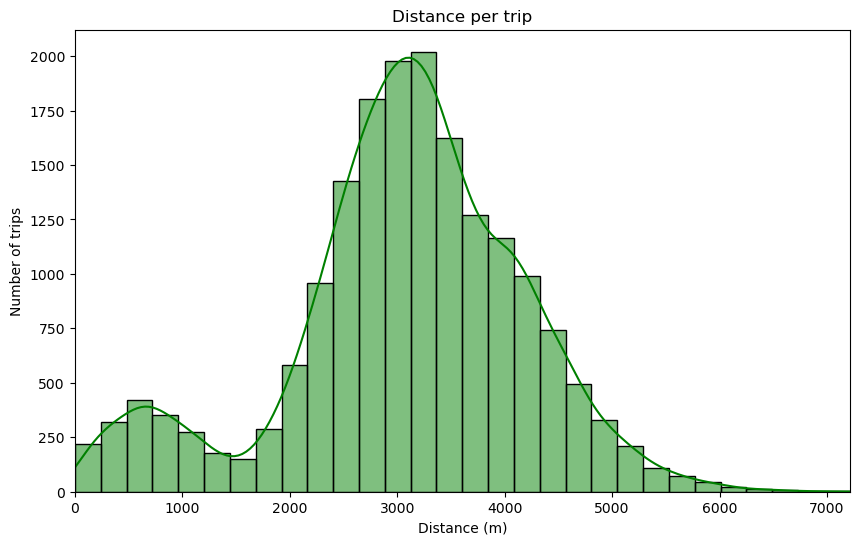

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(rigo['distance'], bins=30, kde=True, color='green')
plt.title('Distance per trip')
plt.xlabel('Distance (m)')
plt.ylabel('Number of trips')
plt.xlim(0, rigo['distance'].max())
plt.show()

**Summary:** Users most frequently travel from 2.5 to 3.5 km per trip. The chart also shows almost a normal distribution, with the exception of a small arc at the very beginning of the X-axis which decreases after reaching 500-meter trips and increases again somewhere around 1750-meter tripswhich decreases after reaching 500-meter trips and increases again somewhere around 1750-meter trips.

### Duration per trip

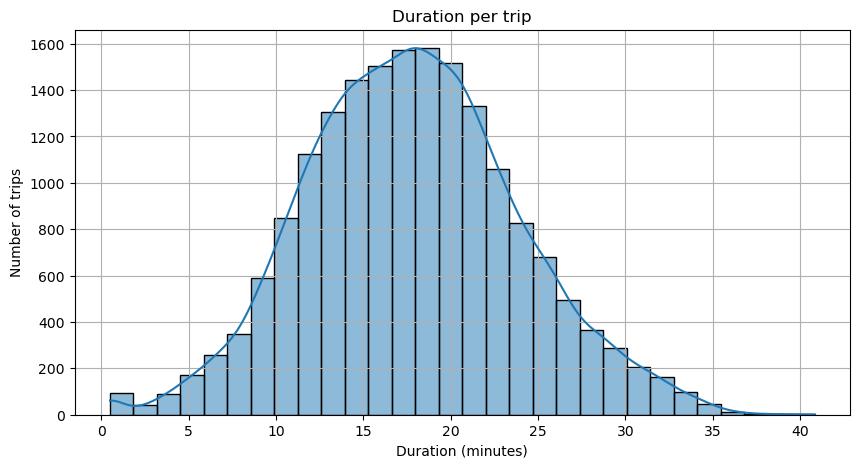

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(rigo['duration'], bins=30, kde=True)
plt.title('Duration per trip')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of trips')
plt.grid()
plt.show()

**Summary:** The distribution of trip duration repeats the previous graph for distance traveled. From it we can conclude that, on average, a trip of 2.5 to 3.5 km takes between 15 and 22 minutes. These are the most numerous duration groups. At the very beginning, we can notice a small “bump” resembling a group of users who travelled ~500 meters.

**Overall summary:** Visualizations for five main metrics have been prepared. Categorical data was represented using a bar chart, while numerical data was represented with a histogram. The distribution yielded the following results:

1. **Cities:** Pyatigorsk leads in the number of users (14.3%), while Moscow takes the last place with 11%. The distribution of cities is relatively even.

2. **Subscription**: The predominant number of users (54.4%) do not have a subscription, but the difference with subscribers is insignificant (45.6%).

3. **Age**: The age distribution of users is normal, with a peak at 25 years. The core audience is aged from 22 to 27, while a small portion is over 37 years old.

4. **Trip distance**: Users typically travel from 2.5 to 3.5 km per trip.

5. **Trip duration**: Most trips last between 15 and 22 minutes.

### Distance and Duration per trip by subscription type

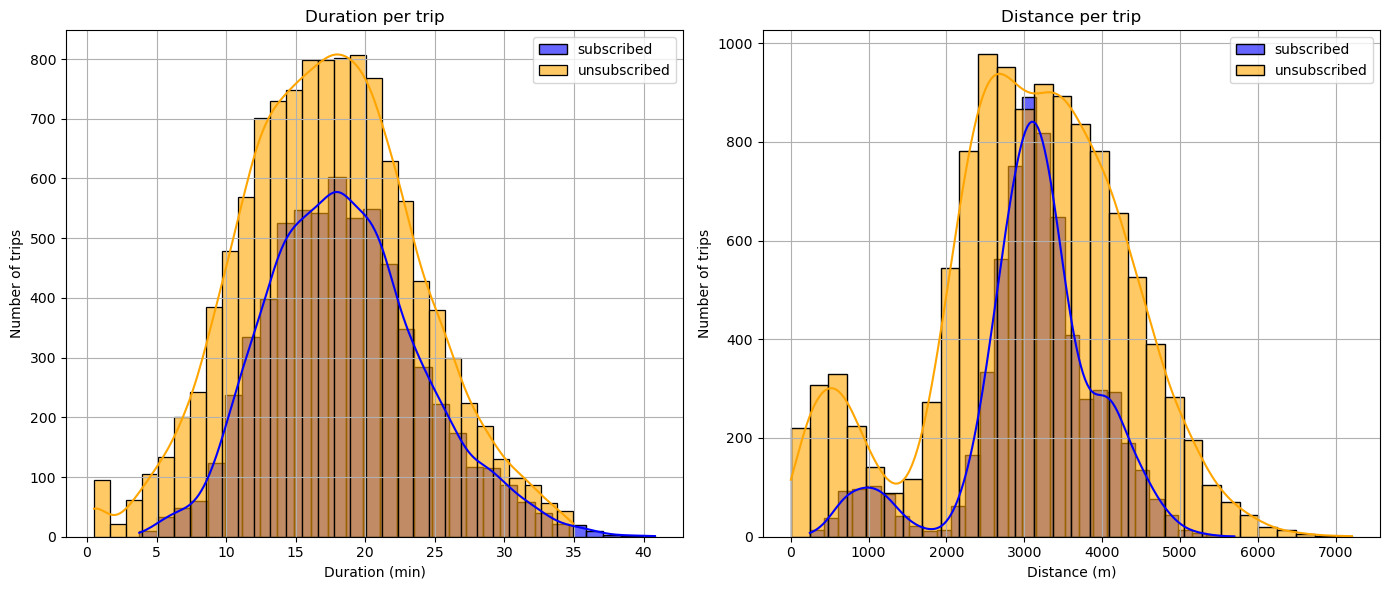

In [31]:
# Creating distinct DataFrames according to subscription type
merged_data = rigo.merge(usgo, on='user_id').merge(sugo, on='subscription_type')

users_with_subscription = merged_data[merged_data['subscription_type'] != 'free']
users_without_subscription = merged_data[merged_data['subscription_type'] == 'free']

plt.figure(figsize=(14, 6))

# Subscribed users histplot
plt.subplot(1, 2, 1)
sns.histplot(users_with_subscription['duration'], bins=30, color='blue', kde=True, label='subscribed', alpha=0.6)
sns.histplot(users_without_subscription['duration'], bins=30, color='orange', kde=True, label='unsubscribed', alpha=0.6)
plt.title('Duration per trip')
plt.xlabel('Duration (min)')
plt.ylabel('Number of trips')
plt.legend()
plt.grid()

# Unsubscribed users histplot
plt.subplot(1, 2, 2)
sns.histplot(users_with_subscription['distance'], bins=30, color='blue', kde=True, label='subscribed', alpha=0.6)
sns.histplot(users_without_subscription['distance'], bins=30, color='orange', kde=True, label='unsubscribed', alpha=0.6)
plt.title('Distance per trip')
plt.xlabel('Distance (m)')
plt.ylabel('Number of trips')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Summary:** All three dataframes were merged into one - `merged_data`. Additionally, based on the aggregated frame, two more were created — one for each type of subscription category. Next, the distribution of trip duration and distance was analyzed using histograms. In summary:

1. The histograms of users with different types of subscriptions show identical development vectors. The only difference observed is in the height of the bars —  it has already become clear that there are more users without subscriptions in the sample.

2. Both graphs demonstrated a "drop" in the number of trips in the interval from 1.5 to 2 km, which corresponds to that "drop" in the "Distance per trip" histplot.

3. There is a slight difference in the patterns of subscribers and non-subscribers: subscribers may travel slightly less kilometers (maximum ~5.5), but the duration of their trips will be longer, up to 40 minutes. Non-subscribers, on the other hand, can travel more than 5.5 kilometers, but the duration of their trips in the sample does not exceed 35 minutes.

4. Unsubscribed users have suspicious indicators in their data, such as zero trip distance or near-zero duration. This may indicate technical problems in the app for non-subscribers. Perhaps the functionality for “non-subscribers” is less convenient or less developed.

### Revenue calculation

In [34]:
merged_data['duration'] = np.ceil(merged_data['duration'])

# creating aggregated DataFrame
aggregated_data = merged_data.groupby(['user_id', 'subscription_type', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_rides=('distance', 'count'),  
    total_duration=('duration', 'sum')  
).reset_index()

In [35]:
# Adding monthly revenue column

def calculate_monthly_revenue(row):
    if row['subscription_type'] == 'free':
        minute_price = 8  
        start_ride_price = 50  
        revenue = (start_ride_price * row['total_rides']) + (minute_price * row['total_duration'])
        return revenue
    else:
        subscription_fee = 199  
        minute_price = 6  
        revenue = (minute_price * row['total_duration']) + subscription_fee
        return revenue

aggregated_data['monthly_revenue'] = aggregated_data.apply(calculate_monthly_revenue, axis=1)
aggregated_data

,user_id,subscription_type,month,total_distance,total_rides,total_duration,monthly_revenue
0,1,ultra,1,7027.511294,2,42.0,451.0
1,1,ultra,4,754.159807,1,7.0,241.0
2,1,ultra,8,6723.470560,2,46.0,475.0
3,1,ultra,10,5809.911100,2,32.0,391.0
4,1,ultra,11,7003.499363,3,56.0,535.0
...,...,...,...,...,...,...,...
11326,1534,free,6,3409.468534,2,26.0,308.0
11327,1534,free,8,7622.453034,2,48.0,484.0
11328,1534,free,9,4928.173852,1,23.0,234.0
11329,1534,free,11,13350.015305,4,78.0,824.0


**Summary:** To test the hypotheses in the next step, it is necessary to prepare an aggregated dataframe, as well as to extract the monthly revenue for each user. In summary:

1. A dataframe called `aggregated_data` was created with aggregated trip data based on the dataframe with combined data from "Distance and Duration per trip by subscription type" step. It contains the total distance, the number of trips and the total time for each user for each month.
2. A `monthly_revenue` column was added to this same dataframe. It contains the monthly revenue generated by each user.  The calculation took into account the cost of starting a trip, the number of trips with their duration and the subscription cost for each user category.

## Hypothesis testing

### Testing the trip duration of subscribed users

**Null hypothesis (H0):** The average trip duration of subscribed users does not exceed the average trip duration of non-subscribed users. (The average trip duration for subscribers is equal to the average trip duration for non-subscribers).

**Alternative hypothesis (H1):** The average trip duration of subscribed users exceeds the average trip duration of non-subscribed users. (The average trip duration for subscribers is greater than the average trip duration for non-subscribers).

**Testing method:** Independent samples t-test to compare the average trip durations for users with and without subscriptions.

In [39]:
# Distincting trip durations by subscription type
duration_with_subscription = merged_data.loc[merged_data['subscription_type'] == 'ultra', 'duration']
duration_without_subscription = merged_data.loc[merged_data['subscription_type'] == 'free', 'duration']

# Conducting the test
t_stat, p_value = st.ttest_ind(duration_with_subscription, duration_without_subscription, alternative='greater')

print(f"T-statistic: {t_stat}, p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: users with subscriptions spend more time travelling.")
else:
    print("We fail to reject the null hypothesis: there is no evidence that users with subscriptions spend more time travelling.")

T-statistic: 12.186464491247767, p-value: 2.4959453720736625e-34
We reject the null hypothesis: users with subscriptions spend more time travelling.


**Summary:** In this analysis, we tested the hypothesis that subscribed users spend more time on trips compared to non-subscribed users. To do this, we analyzed trip duration data by dividing users into two groups: subscribers and non-subscribers.

The results of the t-test conducted for independent samples showed that the t-statistic was 12.19 and the p-value was 2.49e-34. Since the p-value is less than the significance level (alpha = 0.05), we can reject the null hypothesis, which states that there is no significant difference in the time spent on trips between the groups.

Thus, we conclude that subscribed users spend significantly more time on trips compared to non-subscribed users.

### Testing the trip distance of subscribed users

**Null hypothesis (H0):** The average distance traveled by subscribed users does not exceed 3130 meters.

**Alternative hypothesis (H1):** The average distance traveled by subscribed users exceeds 3130 meters.

**Testing method:** One-tailed t-test to test the mean distance. The average trip distance of subscribers is compared to a specified value of 3130 meters.

In [42]:
# Distincting trip distances by subscription type
distance_with_subscription = merged_data.loc[merged_data['subscription_type'] == 'ultra', 'distance']
distance_without_subscription = merged_data.loc[merged_data['subscription_type'] == 'free', 'distance']

# Conducting the test
t_stat_distance, p_value_distance = st.ttest_1samp(distance_with_subscription, 3130, alternative='greater')

print(f"T-statistic: {t_stat_distance}, p-value: {p_value_distance}")

if p_value_distance < alpha:
    print("We reject the null hypothesis: the average trip distance of users with subscription exeeds 3130 meters")
else:
    print("We fail to reject the null hypothesis: there is no evidence that the average trip distance of subscribed users exceeds 3130 meters")

T-statistic: -1.402123166869486, p-value: 0.9195368847849785
We fail to reject the null hypothesis: there is no evidence that the average trip distance of subscribed users exceeds 3130 meters


**Summary:** In this analysis, we tested the hypothesis that the average trip distance of subscribed users does not exceed 3130 meters. To test this hypothesis, a one-sample t-test was conducted. The results of the test showed that the t-statistic was -1.40 and the p-value was 0.91. Since the p-value is significantly higher than the significance level (alpha = 0.05), we cannot reject the null hypothesis.

Thus, based on the analysis conducted, we cannot assert that the average trip distance of subscribed users exceeds 3130 meters. This means that there is no statistically significant evidence to suggest that subscribers travel a distance greater than 3130 meters.

### Testing monthly revenue of subcribed users

**Null hypothesis (H0):** The monthly revenue from subscribed users is not higher than the monthly revenue from non-subscribed users.

**Alternative hypothesis (H1):** The monthly revenue from subscribed users is higher than the monthly revenue from non-subscribed users.

**Testing method:** Independent samples t-test to compare the average monthly revenues from subscribed and non-subscribed users.

In [45]:
# Distincting monthly revenues by subscription type
monthly_revenue_with_subscription = aggregated_data.loc[aggregated_data['subscription_type'] == 'ultra', 'monthly_revenue']
monthly_revenue_without_subscription = aggregated_data.loc[aggregated_data['subscription_type'] == 'free', 'monthly_revenue']

# conducting the test
t_stat_revenue, p_value_revenue = st.ttest_ind(monthly_revenue_with_subscription, monthly_revenue_without_subscription, alternative='greater')

print(f"T-statistic: {t_stat_revenue}, p-value: {p_value_revenue}")

if p_value_revenue < alpha:
    print("We reject the null hypothesis: the monthly revenue from subscribed users is higher than the monthly revenue from non-subscribed users")
else:
    print("We fail to reject the null hypothesis: there is no evidence that the monthly revenue from subscribed users is higher than that from non-subscribed users.")

T-statistic: 11.64246602360774, p-value: 1.8850394384715216e-31
We reject the null hypothesis: the monthly revenue from subscribed users is higher than the monthly revenue from non-subscribed users


**Summary:** In this part of the analysis, we tested the hypothesis that the monthly revenue from subscribed users is higher than that from non-subscribed users. To do this, we compared the monthly revenue data of two user groups using an independent samples t-test.

The result of the test showed that the t-statistic was 11.64 and the p-value was 1.88e-31. Since the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.

Thus, the results of our analysis indicate that the monthly revenue from subscribed users is indeed higher than that from non-subscribed users. This suggests that subscribed users generate higher revenue, which is a valuable insight for developing monetization strategies.

## Final summary and recommendations

In our analysis, we investigated three key hypotheses regarding the behavior of users with subscriptions and those without.

1. **Trips duration:** We found that subscribed users spend significantly more time on trips compared to non-subscribed users. The results of the t-test showed a high t-statistic (12.19) and an extremely low p-value (2.49e-34), allowing us to confidently reject the null hypothesis.

2. **Average trip distance:** In the analysis of average trip distance, we could not confirm that subscribed users travel a distance greater than 3130 meters. The t-statistic was -1.40, and the p-value was 0.91, indicating insignificant effect.

3. **Monthly revenue:** Finally, the results showed that the monthly revenue from subscribed users is significantly higher than that from non-subscribed users. The t-statistic was 11.64, and the p-value was 1.88e-31. This confirms the importance of subscription as a factor that enhances financial performance.

Thus, our analysis revealed clear dependencies between the type of subscription and two important aspects: time spent on trips and monthly revenue. This indicates that subscribed users utilize the service more actively and generate more revenue.

**Recommendations for further steps:**

1. **Additional analysis:** It is recommended to conduct a deeper analysis of other features, such as trip frequency, trip types and geographical data, which may provide more insights into user behavior.

2. **Churn analysis:** It is also worth considering an analysis of churn among subscribed users to identify what factors may lead to subscription cancellations and develop customer retention strategies. For example, GoFast can conduct more statistical tests related to the quality of service. One of the possible ones is described below, it suggests performing the paired t-test (this choice is justified by the fact that we should compare the data from the same group of users, which accounts for the dependence sign): 

```
    Null hypothesis (H0): The number of support tickets after the update did not decrease compared to the number of tickets before the update.

    Alternative hypothesis (H1): The number of support tickets after the update decreased compared to the number of tickets before the update.

    Testing method: Paired t-test for dependent samples (if the data is normally distributed) or Wilcoxon signed-rank test (if the data is not normally distributed) to test the change in the number of support tickets before and after the update.

    Sample data:

    1. calls_before = [/* data on support tickets before the update */]
    2. calls_after = [/* data on support tickets after the update */]

   Perform the paired t-test:
    - t_stat_calls, p_value_calls = st.ttest_rel(calls_before, calls_after, alternative='less')

   Display the results:
    - print(f"T-statistic (tickets): {t_stat_calls}, p-value: {p_value_calls}")

   Hypothesis testing:
    - if p_value_calls < alpha:
      - print("The number of support tickets significantly decreased after the update.")
    - else:
      - print("There is no evidence to suggest that the number of support tickets has decreased.")
```

3. **Cross-Selling:** Given that subscribed users generate more revenue, it would be beneficial to explore opportunities for cross-selling and additional offers for this user group.